# Classification - Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
sklearn.__version__

'0.22.1'

In [3]:
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit
from statsmodels.formula.api import logit

from sklearn.metrics import auc, \
    confusion_matrix, plot_confusion_matrix, classification_report, precision_score, roc_curve, \
    precision_recall_curve, recall_score, f1_score, auc, plot_roc_curve, plot_precision_recall_curve
from sklearn.feature_selection import RFE
from statsmodels.discrete.discrete_model import Logit

In [4]:
from sklearn.datasets import make_classification

## Decision Boundary - Two Class Problem

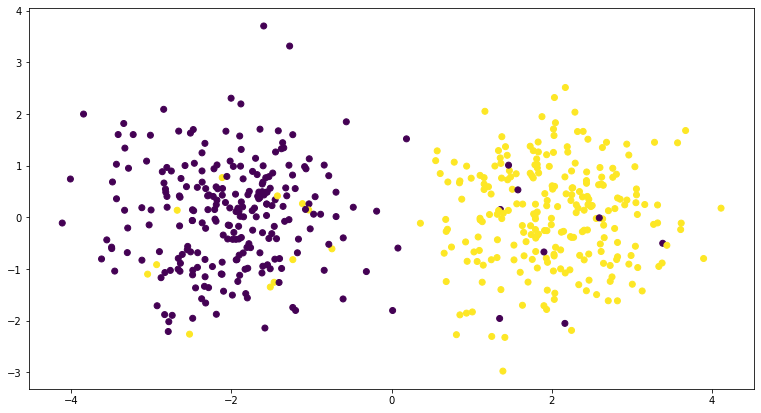

In [79]:
X,y = make_classification(n_samples = 500, n_features=2, n_redundant = 0, n_informative=1,
                          n_clusters_per_class  = 1, random_state = 3, class_sep = 2, 
                          flip_y = 0.1, n_classes = 2) #check 

plt.figure(figsize = (13,7)) 
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [6]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(X,y)
model.score(X, y)

0.954

In [7]:
xmin, xmax = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
ymin, ymax = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

In [8]:
print(f"[xmin, xmax] = [{xmin}, {xmax}]")
print(f"[ymin, ymax] = [{ymin}, {ymax}]")

[xmin, xmax] = [-5.108935907229522, 5.112524142419692]
[ymin, ymax] = [-3.977125312284816, 4.702458237599861]


In [9]:
n_points = 500
x_grid = np.linspace(xmin, xmax, n_points)
y_grid = np.linspace(ymin, ymax, n_points)

In [10]:
xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid) #

Note: numpy.meshgrid - Return coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn.

In [11]:
print(f"xy_grid_x.shape: {xy_grid_x.shape}, xy_grid_y.shape: {xy_grid_y.shape}")

xy_grid_x.shape: (500, 500), xy_grid_y.shape: (500, 500)


In [12]:
xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
predict_labels = model.predict(xy_grid)

Note: numpy.ravel - Return a contiguous flattened array.

A 1-D array, containing the elements of the input, is returned. A copy is made only if needed.

In [13]:
print(f"xy_grid.shape: {xy_grid.shape}")

xy_grid.shape: (250000, 2)


In [14]:
print(f"Predicted Labels: {predict_labels}")

Predicted Labels: [0 0 0 ... 1 1 1]


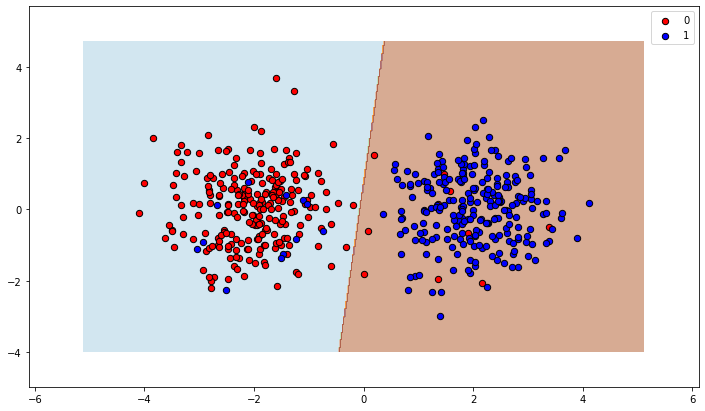

In [15]:
colors = 'rb'
class_names = '01'
tt = zip(colors, class_names, range(2))

plt.figure (figsize = (12,7))
plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)

for colors, class_names, labels in tt:
    idx = np.where(y == labels)
    plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)

plt.legend()
plt.xlim(xmin-1, xmax+1)
plt.ylim(ymin-1, ymax+1)
plt.show()

## Decision Boundary - Multiple Class Problem

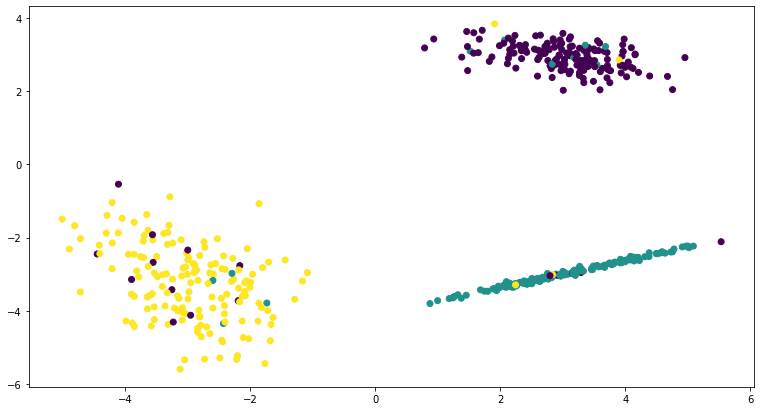

In [16]:
X,y = make_classification(n_samples = 500, n_features=2, n_redundant = 0, n_informative = 2,
                          n_clusters_per_class  = 1, random_state = 3, class_sep = 3, 
                          flip_y = 0.1, n_classes = 3)

plt.figure(figsize = (13,7)) 
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [17]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(X,y)
model.score(X, y)

0.936

In [18]:
xmin, xmax = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
ymin, ymax = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
n_points = 500
x_grid = np.linspace(xmin, xmax, n_points)
y_grid = np.linspace(ymin, ymax, n_points)
xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid)

In [19]:
xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
predict_labels = model.predict(xy_grid)

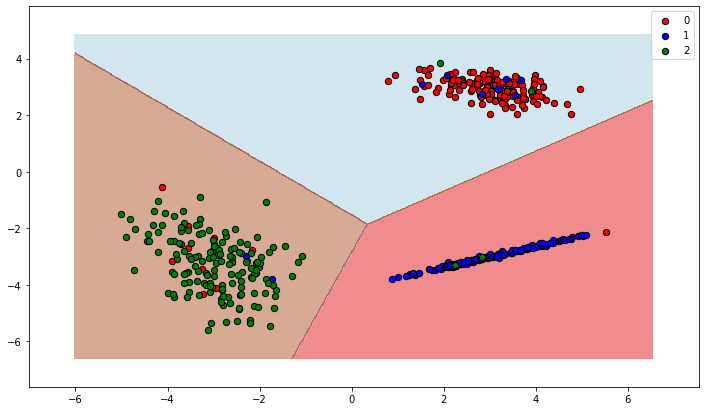

In [20]:
colors = 'rbg'
class_names = '012'
labels = range(3)
tt = zip(colors, class_names, labels)

plt.figure (figsize = (12,7))
plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)

for colors, class_names, labels in tt:
    idx = np.where(y == labels)
    plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)

plt.legend()
plt.xlim(xmin-1, xmax+1)
plt.ylim(ymin-1, ymax+1)
plt.show()

## Classification Measures

In [21]:
X,y = make_classification(n_samples = 1500, n_features = 10, n_redundant = 4, n_informative = 3,
                          n_clusters_per_class  = 1, random_state = 3, class_sep = 2, 
                          flip_y = 0.2, n_classes = 3)

In [22]:
print("Number of Classes in y: {np.unique(y)}")

Number of Classes in y: {np.unique(y)}


In [23]:
print(f"Precentage of obeservations belonging to class 0: {round(np.sum(y == 0)/len(y)*100,2)}%|")
print(f"Precentage of obeservations belonging to class 1: {round(np.sum(y == 1)/len(y)*100,2)}%|")
print(f"Precentage of obeservations belonging to class 2: {round(np.sum(y == 2)/len(y)*100,2)}%|")

Precentage of obeservations belonging to class 0: 32.8%|
Precentage of obeservations belonging to class 1: 32.93%|
Precentage of obeservations belonging to class 2: 34.27%|


In [24]:
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto')
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print(f"Model Score/Accuracy: {model.score(X, y)}")

Model Score/Accuracy: 0.832


In [26]:
y_predict = model.predict(X)
y_predict

array([1, 2, 2, ..., 0, 1, 0])

In [27]:
print(confusion_matrix(y, y_predict))

[[406  52  34]
 [ 41 416  37]
 [ 37  51 426]]


In [28]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       492
           1       0.80      0.84      0.82       494
           2       0.86      0.83      0.84       514

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



In [29]:
print(precision_score(y, y_predict, average = None))

[0.83884298 0.80154143 0.85714286]


In [30]:
print(recall_score(y, y_predict, average = None))

[0.82520325 0.84210526 0.82879377]


In [31]:
print(f1_score(y, y_predict, average = None))

[0.83196721 0.8213228  0.84272997]


## ROC/PR Curves

In [32]:
X,y = make_classification(n_samples = 1500, n_features = 10, n_redundant = 4, n_informative = 3,
                          n_clusters_per_class  = 1, random_state = 3, class_sep = 2, 
                          flip_y = 0.2, n_classes = 2)
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto')
model.fit(X,y)
model.score(X, y)

0.8886666666666667

In [33]:
y_score = model.predict_proba(X)

#### Note: predict vs predict_proba

Predict will give either 0 or 1 as output; 
Predict_proba will give the only probability of 1.

In [34]:
print(f"Probs of each observation to be in class: \n {y_score}")

Probs of each observation to be in class: 
 [[0.95647269 0.04352731]
 [0.8551878  0.1448122 ]
 [0.13253627 0.86746373]
 ...
 [0.96419607 0.03580393]
 [0.14157044 0.85842956]
 [0.69784414 0.30215586]]


In [35]:
fpr0, tpr0, thresholds0 = roc_curve(y, y_score[:,0], pos_label = 0) # If labels are not either {-1, 1} or {0, 1}, then pos_label should be explicitly given
print("AUC (degree or measure of separability):", auc(fpr0,tpr0))

fpr1, tpr1, thresholds1 = roc_curve(y, y_score[:,1], pos_label = 1)
print("AUC (degree or measure of separability):", auc(fpr1,tpr1))

AUC (degree or measure of separability): 0.8937085945489308
AUC (degree or measure of separability): 0.8937085945489307


In [36]:
fpr0.shape

(288,)

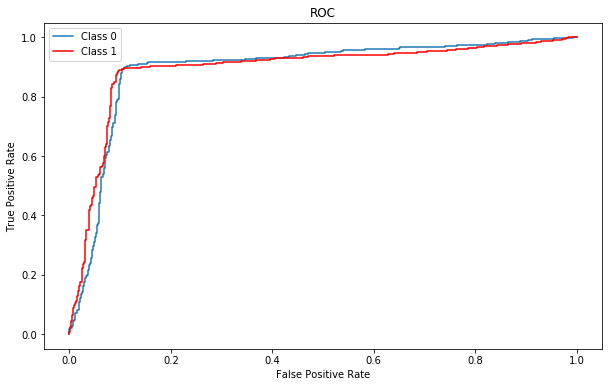

In [37]:

plt.figure(figsize = (10,6))
plt.plot(fpr0, tpr0, "-", label = "Class 0")
plt.plot(fpr1, tpr1, "-", color = 'r', label = "Class 1")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC")
plt.show()



AUC: 0.8501252832181386
AUC: 0.8794600655916632


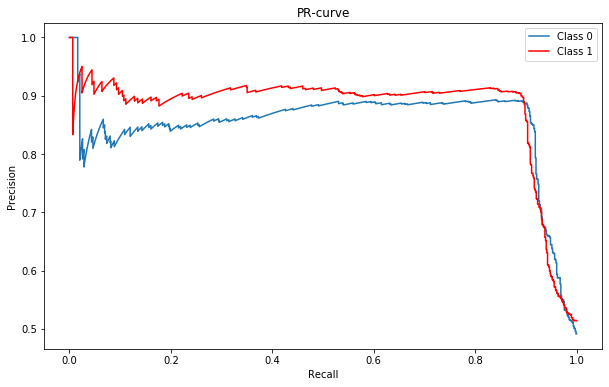

In [38]:
p0, r0, thresholds0 = precision_recall_curve(y, y_score[:,0], pos_label = 0)
print(f"AUC: {auc(r0,p0)}")

p1, r1, thresholds1 = precision_recall_curve(y, y_score[:,1], pos_label = 1)
print(f"AUC: {auc(r1,p1)}")

plt.figure(figsize = (10,6))
plt.plot(r0, p0, "-", label = "Class 0")
plt.plot(r1, p1, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")
plt.show()

## Statsmodels Library

In [39]:
X,y = make_classification(n_samples = 1500, n_features = 10, n_redundant = 4, n_informative = 3,
                          n_clusters_per_class  = 1, random_state = 3, class_sep = 1, 
                          flip_y = 0.2, n_classes = 2)

In [40]:
X.shape

(1500, 10)

In [41]:
y.shape

(1500,)

In [42]:
y = y.reshape(y.shape[0],1)
y.shape

(1500, 1)

In [43]:
data = np.append(X,y, axis = 1)
data = pd.DataFrame(data)
data.columns = np.array(["A","B","C","D","E","F","G","H","I","J","Response"])
data["Response"] = data['Response'].astype(np.int64)
data.head(5)

,A,B,C,D,E,F,G,H,I,J,Response
0,-0.204372,0.127962,0.018368,1.505029,0.159774,0.854578,-1.995061,0.656713,3.452818,-0.677670,0
1,0.740640,0.659706,-0.989340,0.923492,1.232672,0.973544,-0.463160,1.009816,1.942231,-0.206639,0
2,1.728064,1.544157,0.295293,0.992456,-1.495849,1.046969,0.766071,1.543466,1.129554,1.516650,1
3,5.419439,3.944898,-0.422348,1.036030,-1.778653,3.183069,3.778706,4.231484,0.784514,0.259415,1
4,1.003607,1.351423,0.989644,1.261055,1.596084,0.275991,0.327560,0.949773,0.984558,-0.647390,1


In [44]:
model_sm = logit("Response ~ A + B + C + D + E + F + G + H + I + J", data)
mf = model_sm.fit(maxiter = 10000)
mf.summary()

         Current function value: 0.497187
         Iterations: 10000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                            6
Date:                Wed, 11 Mar 2020   Pseudo R-squ.:                  0.2825
Time:                        15:08:54   Log-Likelihood:                -745.78
converged:                      False   LL-Null:                       -1039.4
Covariance Type:            nonrobust   LLR p-value:                1.293e-123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5750      0.164      9.619      0.000       1.254       1.896
A              0.0116   2.18e+05   5.32e-08      1.000   -4.27e+05    4.27e+05
B              0.3399        nan        nan        nan         nan         nan
C              0.1291      0.066      1.968      0.049       0.001       0.258
D              0.1426        nan        nan        nan         nan         nan
E             -0.0892      0.065     -1.382      0.167      -0.216       0.037
F             -0.6088        nan        nan        nan         nan         nan
G              0.4905   9.68e+05   5.07e-07      1.000    -1.9e+06     1.9e+06
H             -0.2012        nan        nan        nan         nan         nan
I             -0.8036   1.98e+06  -4.06e-07      1.000   -3.87e+06    3.87e+06
J              0.0424      0.065      0.653      0.514      -0.085       0.170
==============================================================================
"""

In [45]:
X[:,0]=1
model = Logit(y,X)
result = model.fit(maxiter = 500)
result.summary()

         Current function value: 0.497187
         Iterations: 500


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                            6
Date:                Wed, 11 Mar 2020   Pseudo R-squ.:                  0.2825
Time:                        15:08:54   Log-Likelihood:                -745.78
converged:                      False   LL-Null:                       -1039.4
Covariance Type:            nonrobust   LLR p-value:                1.293e-123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5750      0.164      9.619      0.000       1.254       1.896
x1             0.3438        nan        nan        nan         nan         nan
x2             0.1291      0.066      1.968      0.049       0.001       0.258
x3             0.1422        nan        nan        nan         nan         nan
x4            -0.0892      0.065     -1.382      0.167      -0.216       0.037
x5            -0.6051        nan        nan        nan         nan         nan
x6             0.4947   2.11e+06   2.35e-07      1.000   -4.13e+06    4.13e+06
x7            -0.1964        nan        nan        nan         nan         nan
x8            -0.8037        nan        nan        nan         nan         nan
x9             0.0424      0.065      0.653      0.514      -0.085       0.170
==============================================================================
"""

In [46]:
result.predict(X)

array([0.06814387, 0.29097163, 0.73448024, ..., 0.05449209, 0.7176819 ,
       0.52937967])

## To be Continued!

## Credit Data

In [47]:
data_default = pd.read_csv("Data/Default.csv")
data_default.drop(['Unnamed: 0'], axis = 1, inplace = True)
data_default.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [48]:
data_default_dummies = pd.get_dummies(data_default, drop_first = True)
data_default_dummies.head(5)

,balance,income,default_Yes,student_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [49]:
print(np.unique(data_default_dummies.default_Yes, return_counts = True))

(array([0, 1], dtype=uint8), array([9667,  333]))


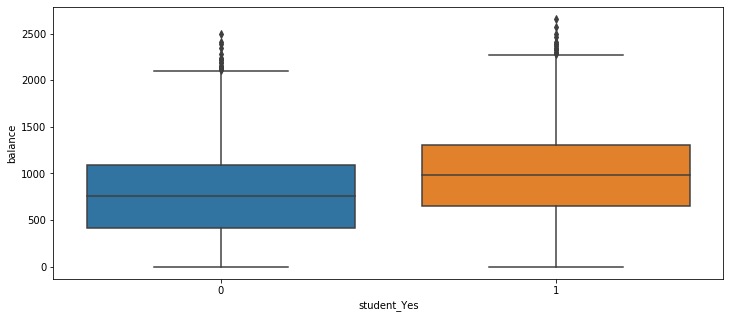

In [50]:
plt.figure(figsize = (12,5))
sns.boxplot(y = "balance", x = "student_Yes", data = data_default_dummies)
plt.show()

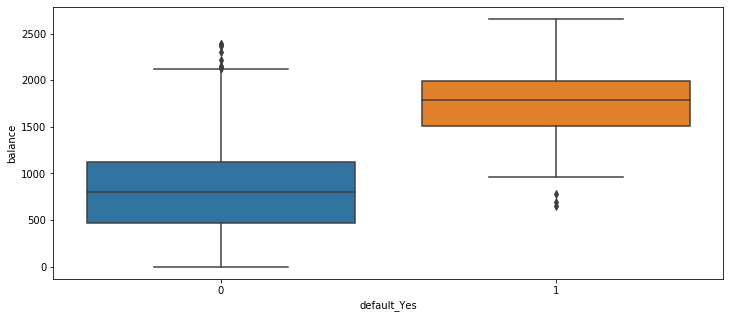

In [51]:
plt.figure(figsize = (12,5))
sns.boxplot(y = "balance", x = "default_Yes", data = data_default_dummies)
plt.show()

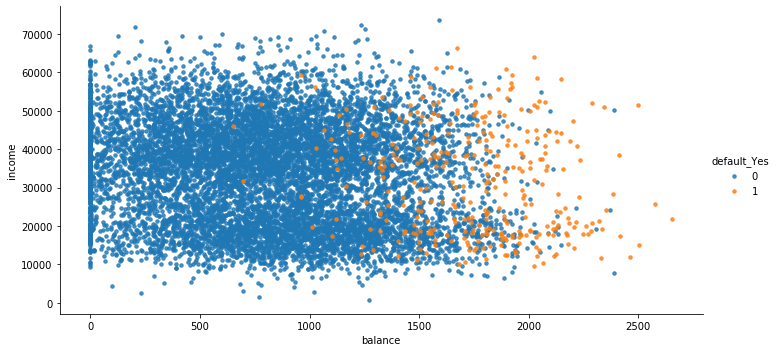

In [52]:
sns.lmplot(y = "income", x = "balance", data = data_default_dummies, 
           hue = 'default_Yes',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [53]:
X = data_default_dummies.drop(['default_Yes'], axis = 1)
y = data_default_dummies['default_Yes']

log_reg = LogisticRegression(max_iter=1000, tol=0.000001, solver = 'lbfgs')
mod_log_reg = log_reg.fit(X,y)
log_reg.fit(X,y)

print(mod_log_reg.coef_)
print(mod_log_reg.intercept_)
print(mod_log_reg.score(X,y))

pred = mod_log_reg.predict(X)
pred_prob = mod_log_reg.predict_proba(X)

[[ 4.08201022e-03 -1.33893466e-04 -3.89009045e+00]]
[-2.9508496]
0.9671


In [54]:
tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred = pred, labels = np.array([0,1])).ravel()
print(f"True Negatives: {tn}, True Positives: {tp}")
print(f"False Positives: {fp}, False Negatives: {fn}")

True Negatives: 9609, True Positives: 62
False Positives: 58, False Negatives: 271


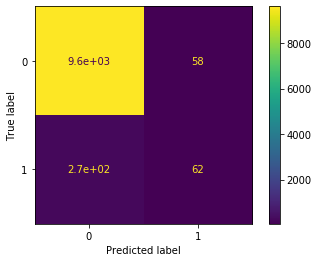

<Figure size 1080x360 with 0 Axes>

In [55]:
plot_confusion_matrix(log_reg, X, y, display_labels = np.array([0,1]))
plt.figure(figsize = (15,5))
plt.show()

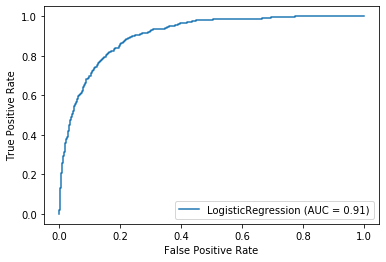

In [56]:
plot_roc_curve(log_reg, X, y)

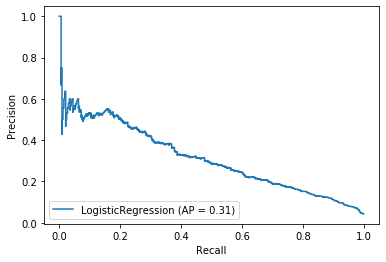

In [57]:
plot_precision_recall_curve(log_reg, X, y)

In [58]:
print(classification_report(y, pred, digits = 6))

              precision    recall  f1-score   support

           0   0.972571  0.994000  0.983169      9667
           1   0.516667  0.186186  0.273731       333

    accuracy                       0.967100     10000
   macro avg   0.744619  0.590093  0.628450     10000
weighted avg   0.957389  0.967100  0.959544     10000



In [59]:
precision, recall, thresholds = precision_recall_curve(y_true = y, probas_pred = pred_prob[:,1], pos_label = 1)
print(auc(recall,precision))

0.3109777939594273


## Class Imbalance Problem

In [60]:
X = data_default_dummies.drop(['default_Yes'], axis = 1)
y = data_default_dummies['default_Yes']

log_reg = LogisticRegression(max_iter=1000, tol=0.000001, solver = 'lbfgs', class_weight = {0: 0.8, 1: 0.2})
mod_log_reg = log_reg.fit(X,y)
log_reg.fit(X,y)

print(mod_log_reg.coef_)
print(mod_log_reg.intercept_)
print(mod_log_reg.score(X,y))

pred = mod_log_reg.predict(X)
pred_prob = mod_log_reg.predict_proba(X)

[[ 5.71723864e-03  7.18005637e-06 -5.37549404e-01]]
[-12.39236297]
0.9693


In [61]:
tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred = pred, labels = np.array([0,1])).ravel()
print(tn, fp, fn, tp)

9663 4 303 30


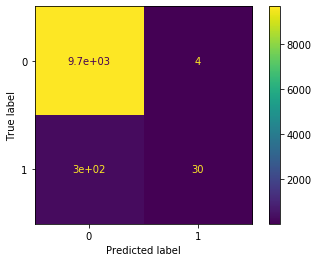

<Figure size 1080x360 with 0 Axes>

In [62]:
plot_confusion_matrix(log_reg, X, y, display_labels = np.array([0,1]))
plt.figure(figsize = (15,5))
plt.show()

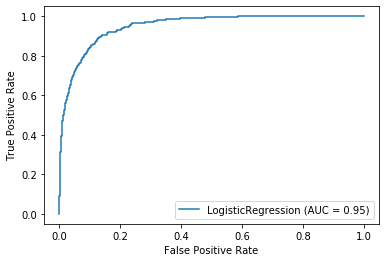

In [63]:
plot_roc_curve(log_reg, X, y)

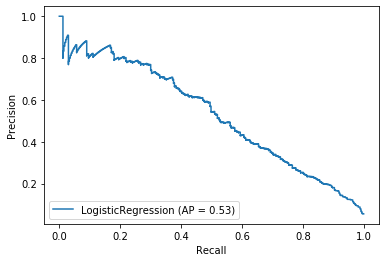

In [64]:
plot_precision_recall_curve(log_reg, X, y)